# Introduction
## Rapid EDA
This file, along with others, is part of a series I'm calling Rapid EDA. These Rapid EDAs are 1 hour long exploratory data analyses where I take a dataset and do as much as I can within an hour.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
cal = pd.read_csv('calories.csv')
exer =  pd.read_csv('exercise.csv')

In [3]:
cal.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
exer.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [6]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User_ID   15000 non-null  int64  
 1   Calories  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 234.5 KB


In [8]:
exer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 937.6+ KB


In [15]:
# Combine the two datasets useing the User_ID as the key
df = pd.merge(cal, exer, on='User_ID')

In [16]:
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [14]:
# Lets see if there is any noticable correlation between any two variables
sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

I noticed correlation between calories, duration, heart rate, and body tempature so those are going to be the categories i want to discover more about

With the 4 categories i specified above, I wondered if gender or age had any impact on the correlation and/or result

# Question 1 Does age and/or gender impact the amount of calories per minute of exercise?

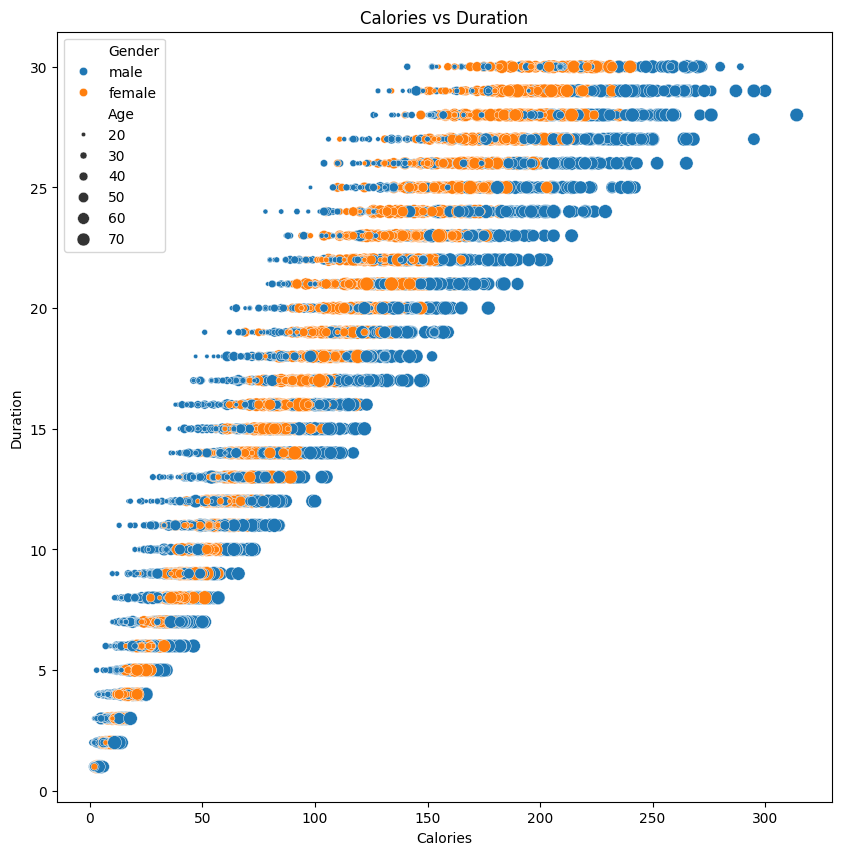

In [33]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x=df['Calories'], y=df['Duration'], hue=df['Gender'], size=df['Age'], sizes=(10,100), ax=ax)
plt.title('Calories vs Duration')
plt.xlabel('Calories')
plt.ylabel('Duration')
plt.show()

In [35]:
# calories per minute calculation
df['cal_per_min'] = df['Calories'] / df['Duration']

#Question 2: How does calories per minute affect heart rate for each age and/or gender?

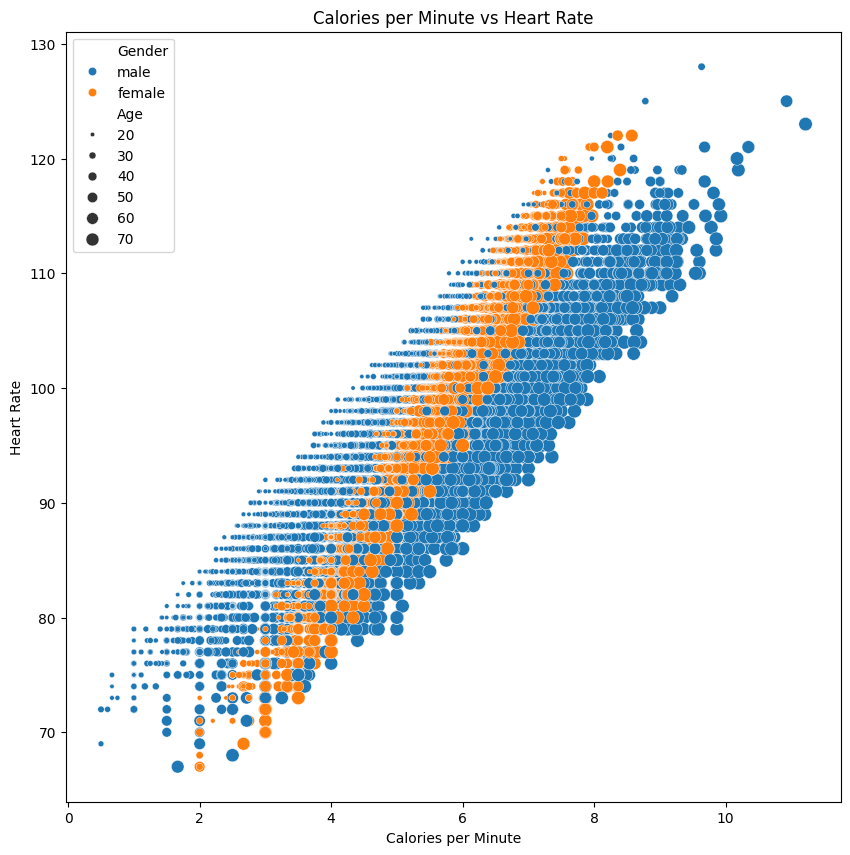

In [40]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x=df['cal_per_min'], y=df['Heart_Rate'], hue=df['Gender'], size=df['Age'], sizes=(10,100), ax=ax)
plt.title('Calories per Minute vs Heart Rate')
plt.xlabel('Calories per Minute')
plt.ylabel('Heart Rate')
plt.show()

#Question 3: Is there a relation between Age and/or Gender with the relation of calories per minute and body tempature?

In [44]:
df['Body_Temp_F'] = df['Body_Temp'] * 9/5 + 32

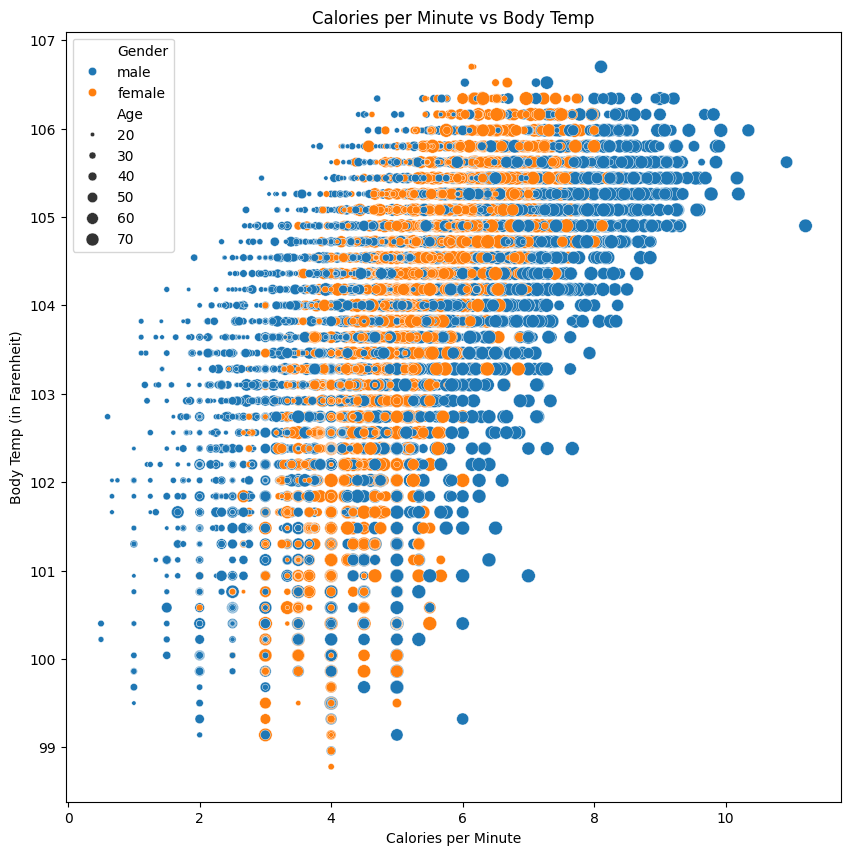

In [46]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x=df['cal_per_min'], y=df['Body_Temp_F'], hue=df['Gender'], size=df['Age'], sizes=(10,100), ax=ax)
plt.title('Calories per Minute vs Body Temp')
plt.xlabel('Calories per Minute')
plt.ylabel('Body Temp (in Farenheit)')
plt.show()

#Question 4: Is there a relation between Age and/or Gender with the relation of heart rate and body tempature?

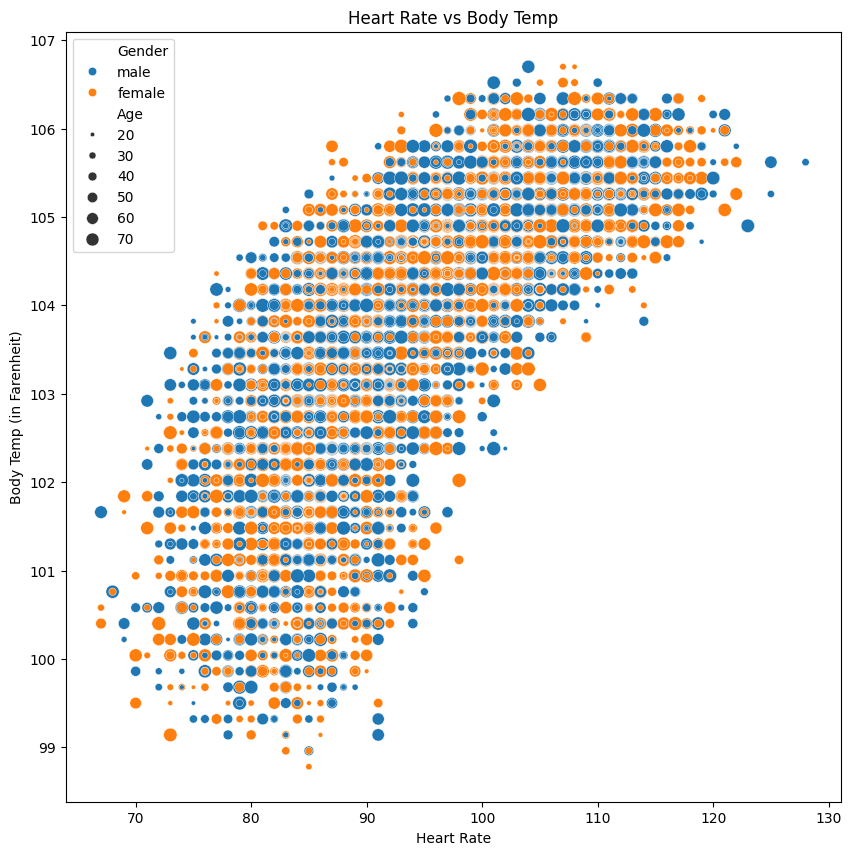

In [47]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x=df['Heart_Rate'], y=df['Body_Temp_F'], hue=df['Gender'], size=df['Age'], sizes=(10,100), ax=ax)
plt.title('Heart Rate vs Body Temp')
plt.xlabel('Heart Rate')
plt.ylabel('Body Temp (in Farenheit)')
plt.show()

### No identifiable relation between age and/or gender with the correlation of heart rate and Body Temp

# For the Height vs Weight Correlation, what is the age/gender spread look like within that?

Height vs Weight, in Age and Gender

In [49]:
# Convert kg to lbs
df['Weight_lbs'] = df['Weight'] * 2.20462

# Convert cm to inches
df['Height_in'] = df['Height'] * 0.393701

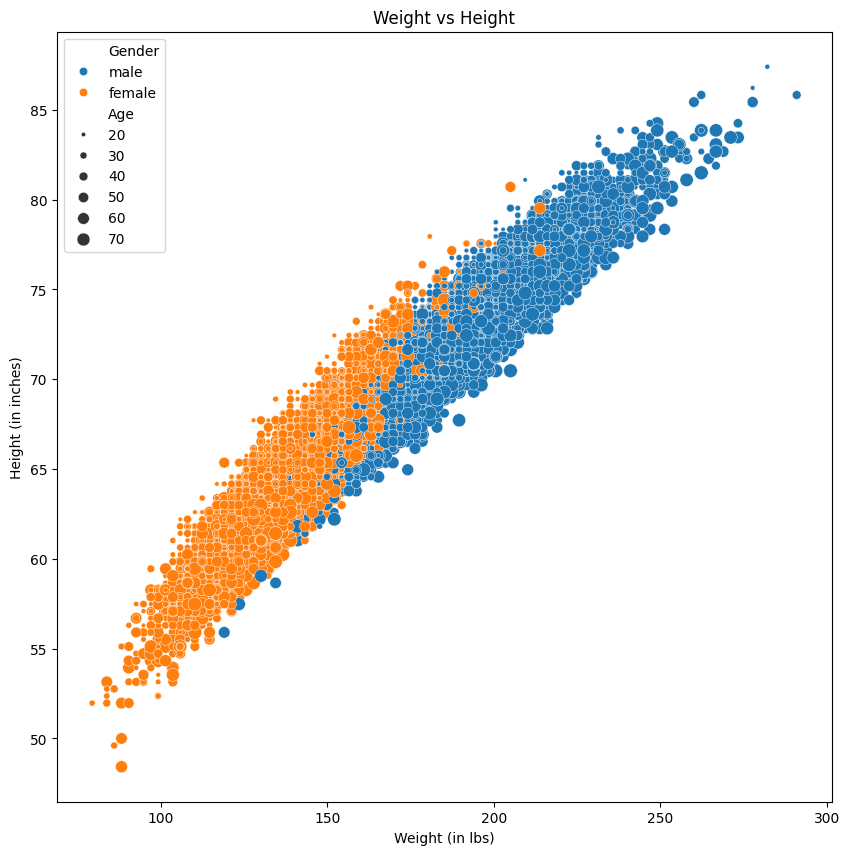

In [51]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x=df['Weight_lbs'], y=df['Height_in'], hue=df['Gender'], size=df['Age'], sizes=(10,100), ax=ax)
plt.title('Weight vs Height')
plt.xlabel('Weight (in lbs)')
plt.ylabel('Height (in inches)')
plt.show()

In [62]:
df_limited = df[['Calories', 'Duration', 'Heart_Rate', 'Body_Temp_F', 'cal_per_min']]

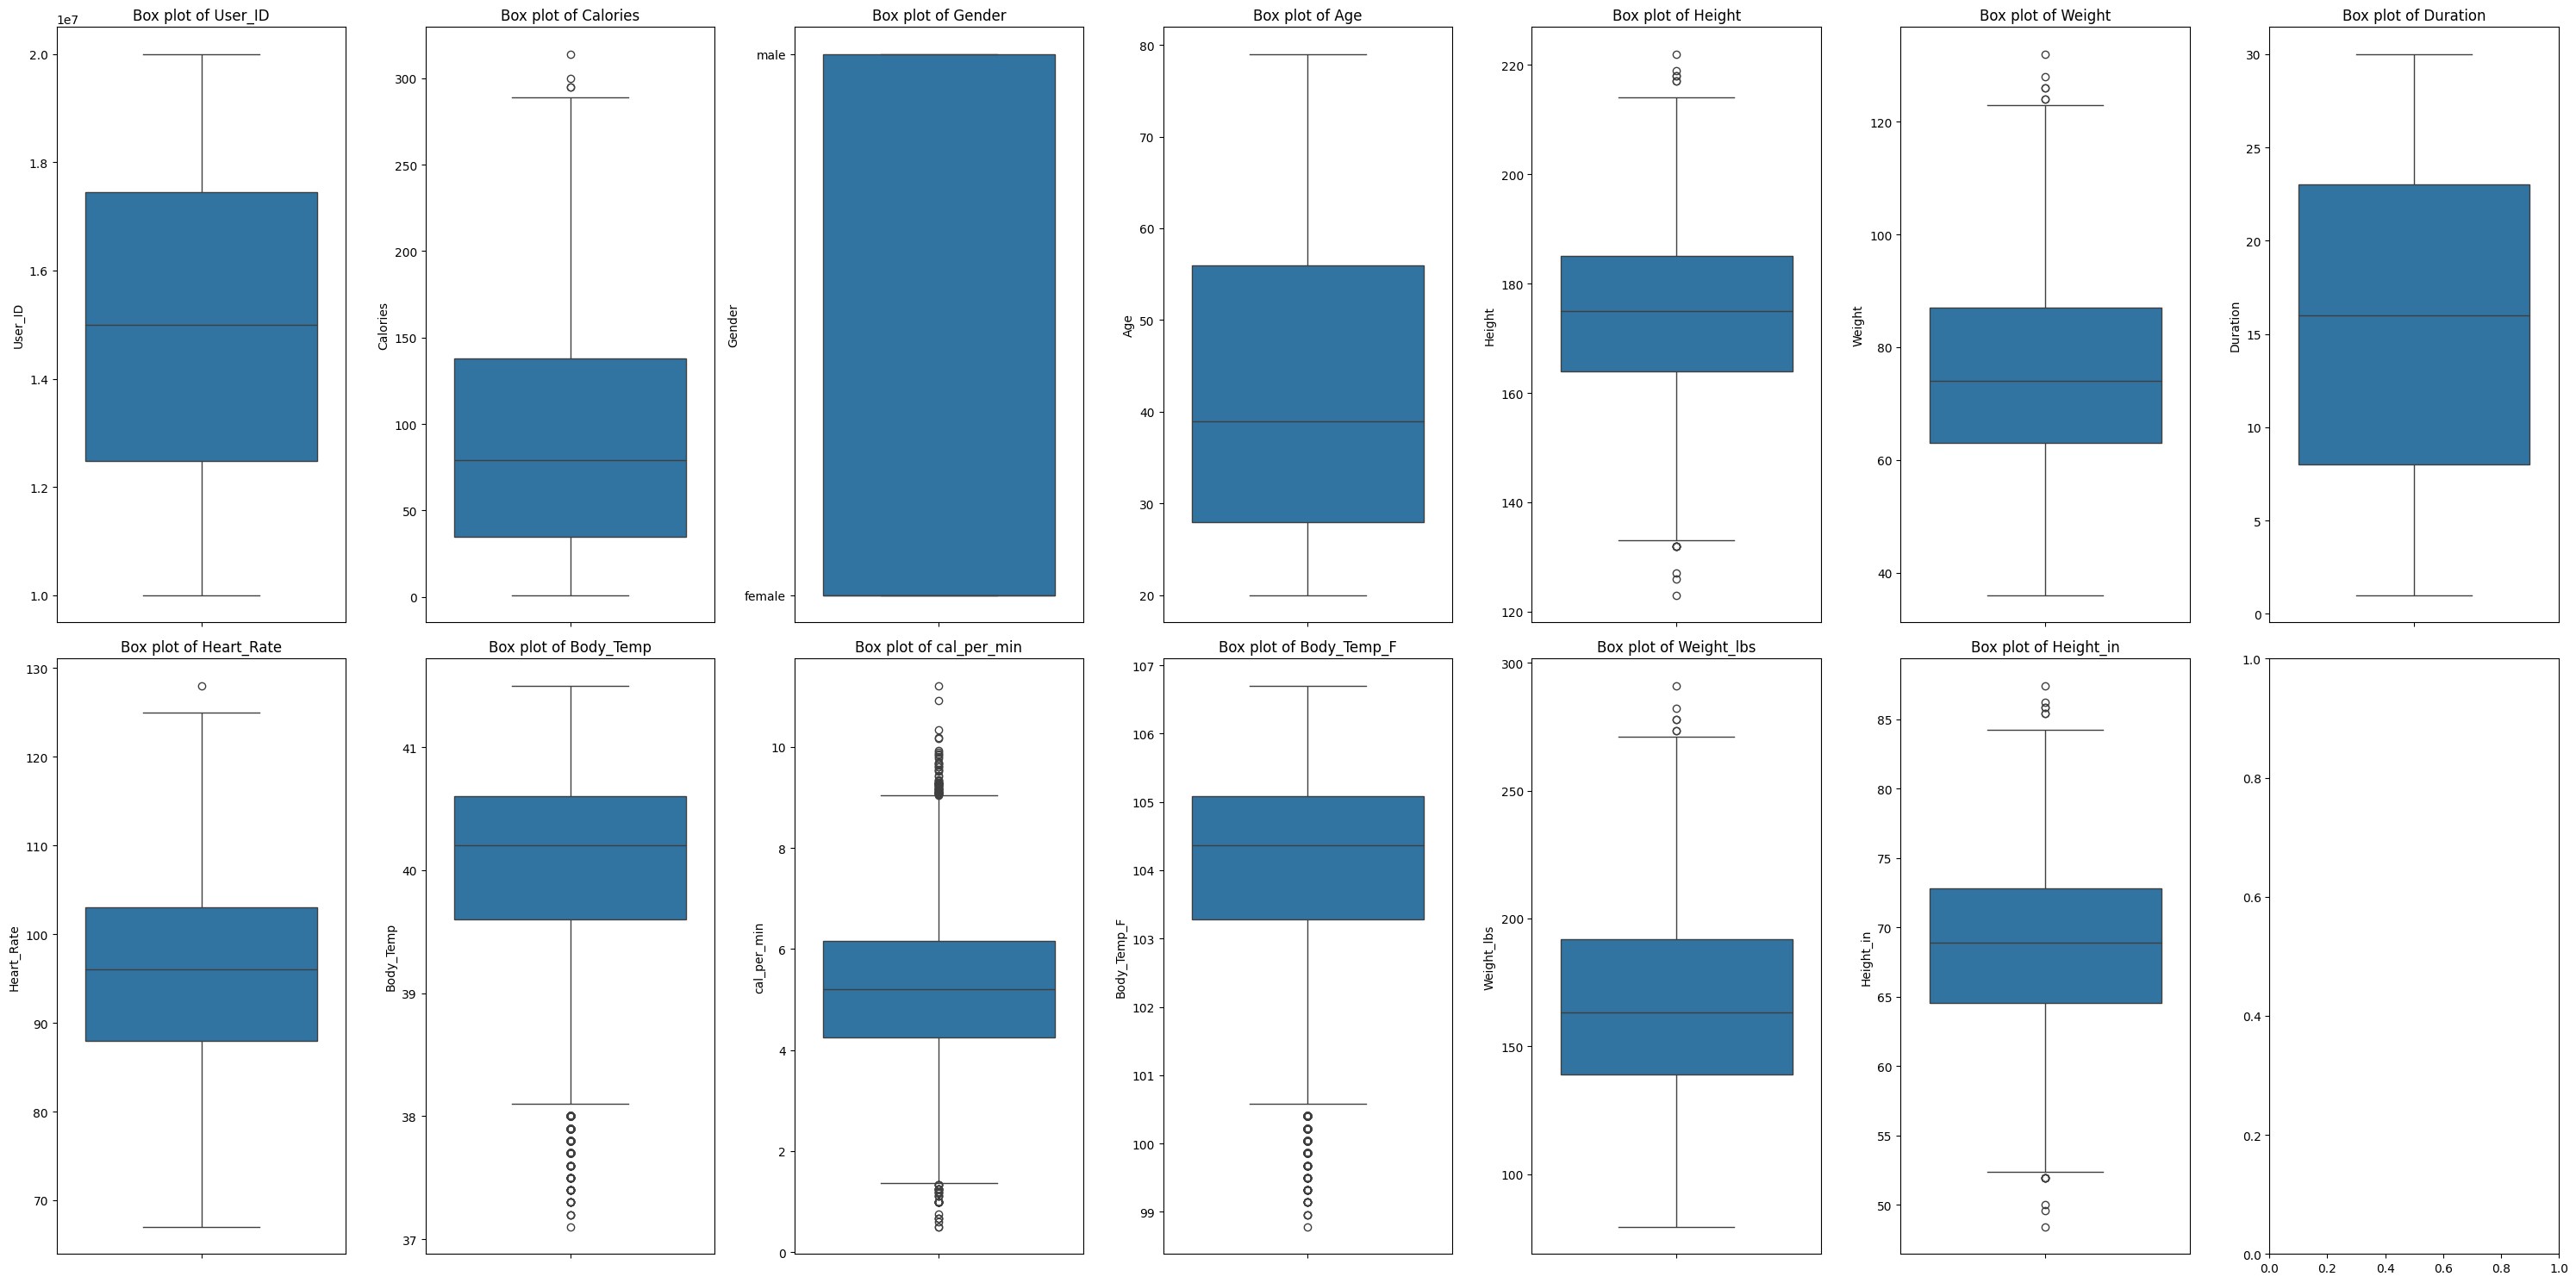

In [73]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(30, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create box plots for each column in the list
for i, column in enumerate(df.columns):
    sns.boxplot(y=column, data=df, ax=axes[i])
    axes[i].set_title(f'Box plot of {column}')

# Adjust layout to prevent overlap
plt.tight_layout()
# Display the plots
plt.show()